Use decision trees and Random forest to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

Data Description :

Undergrad : person is under graduated or not

Marital.Status : marital status of a person

Taxable.Income : Taxable income is the amount of how much tax an 
individual owes to the government 

Work Experience : Work experience of an individual person

Urban : Whether that person belongs to urban area or not

##Decision tree for Fraud_dataset

In [ ]:
#importing the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
#Loading the data
fraud_df=pd.read_csv('/content/Fraud_check.csv')
fraud_df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [ ]:
fraud_df.shape

(600, 6)

600 rows and 6 columns

In [ ]:
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


There are no null values in our dataset.

In [ ]:
fraud_df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


*   Taxable.Income = The Tax inc ranges from 100003 to 99619 with an average of 55208. Only below 25 percentage of the people have less than 30000 Tax Inc. i.e., below 25% of our data are categorised as risk status under Taxable Income.
*   City.Population = There is little dense cities(25780) to 10 times denser cities(~200000).
*   Work.Experience = There are freshers having 0 work exp to those having 30 years of work exp. The average work exp is 15.5 years.





In [ ]:
fraud_df.describe(include='O')

,Undergrad,Marital.Status,Urban
count,600,600,600
unique,2,3,2
top,YES,Single,YES
freq,312,217,302


We have almost equal records of each category

In [ ]:
#Create dummy variables for Undergrad, Marital.Status and Urban
fraud_df=pd.get_dummies(fraud_df,columns=['Undergrad','Marital.Status','Urban'], drop_first=True)

In [ ]:
fraud_df.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,68833,50047,10,0,0,1,1
1,33700,134075,18,1,0,0,1
2,36925,160205,30,0,1,0,1
3,50190,193264,15,1,0,1,1
4,81002,27533,28,0,1,0,0


In [ ]:
#Encode the Risk(0) for values <=30000 and Good(1) for >30000
forfraud_df['Taxable.Income']=np.where((fraud_df['Taxable.Income']<=30000),0,fraud_df['Taxable.Income'])
fraud_df['Taxable.Income']=np.where((fraud_df['Taxable.Income']>30000),1,fraud_df['Taxable.Income'])

In [ ]:
fraud_df.head(2)

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,1,50047,10,0,0,1,1
1,1,134075,18,1,0,0,1


In [ ]:
fraud_df['Taxable.Income'].value_counts()

1    476
0    124
Name: Taxable.Income, dtype: int64

In [ ]:
# Normalize the data with MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
df_norm= MinMaxScaler().fit_transform(fraud_df)
df_norm=pd.DataFrame(df_norm)
df_norm.head()

,0,1,2,3,4,5,6
0,1.0,0.139472,0.333333,0.0,0.0,1.0,1.0
1,1.0,0.622394,0.600000,1.0,0.0,0.0,1.0
2,1.0,0.772568,1.000000,0.0,1.0,0.0,1.0
3,1.0,0.962563,0.500000,1.0,0.0,1.0,1.0
4,1.0,0.010081,0.933333,0.0,1.0,0.0,0.0


In [ ]:
#Extract the features
X=df_norm.iloc[:,1:].values
y=df_norm.iloc[:,0].values

In [ ]:
print(X.shape)
print(y.shape)

(600, 6)
(600,)


In [ ]:
# Splitting the data into train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(480, 6) (120, 6) (480,) (120,)


##Decision Tree Model

In [ ]:
dec_class = DecisionTreeClassifier( random_state = 0)
dec_class.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
train_pred = dec_class.predict(X_train)
y_pred=dec_class.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_train= confusion_matrix(y_train, train_pred)
print(cm_train)
print(accuracy_score(y_train, train_pred))

cm_test= confusion_matrix(y_test, y_pred)
print(cm_test)
print(accuracy_score(y_test, y_pred))



[[ 99   0]
 [  0 381]]
1.0
[[ 8 17]
 [20 75]]
0.6916666666666667


We can see that our model is overfitting with train set accuracy score 1. Therefore, we need to optimize our model parameters. This is done by either Post pruning or Pre pruning.

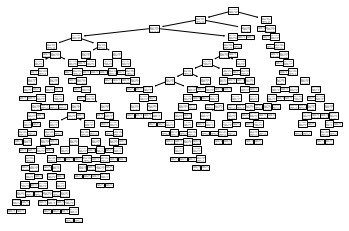

In [ ]:
#PLot the decision tree
tree.plot_tree(dec_class);

##Pre-pruning the model

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_param={"criterion":["gini","entropy"],
             "splitter":["best","random"],
             "max_depth":range(2,30,1),
             "min_samples_leaf":range(1,15,1),
             "min_samples_split":range(2,20,1) 
            }
grid_search=GridSearchCV(estimator=dec_class,param_grid=grid_param,cv=5,n_jobs=-1)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 30),
                  

In [ ]:
#Get the best parameters
print(grid_search.best_params_)

{'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 3, 'min_samples_split': 19, 'splitter': 'random'}


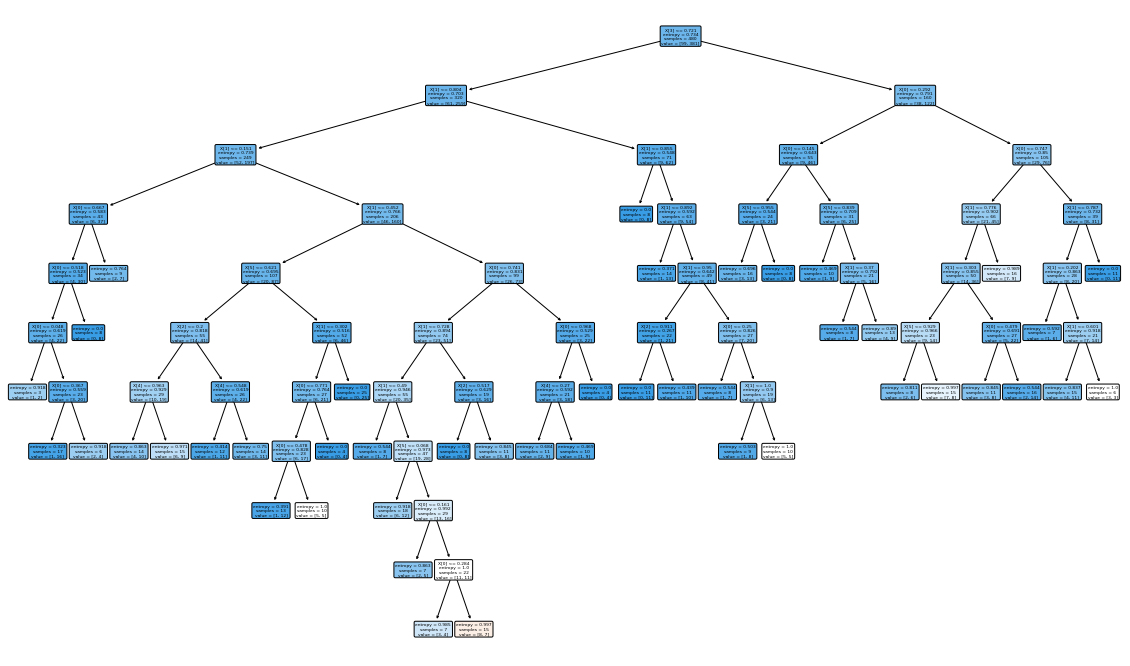

In [ ]:
classifier=DecisionTreeClassifier(criterion= 'entropy',max_depth= 17,min_samples_leaf= 3,min_samples_split= 19,splitter= 'random')
classifier.fit(X_train,y_train)
plt.figure(figsize=(20,12))
tree.plot_tree(classifier,rounded=True,filled=True)
plt.show()

After Pre-pruning (after choosing the best parameters)

In [ ]:
train_pred = classifier.predict(X_train)
y_pred=classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_train= confusion_matrix(y_train, train_pred)
print(cm_train)
print('Accuracy of train dataset:{}'.format(accuracy_score(y_train, train_pred)))

cm_test= confusion_matrix(y_test, y_pred)
print(cm_test)
print('Accuracy of test dataset:{}'.format(accuracy_score(y_test, y_pred)))

[[ 21  78]
 [ 20 361]]
Accuracy of train dataset:0.7958333333333333
[[ 3 22]
 [ 6 89]]
Accuracy of test dataset:0.7666666666666667


Let us predict the Status of Tax Income for the new data point:
*   City.Population = 156205
*   Work.Experience = 12
*   Undergrad = NO
*   Marital_Status = Single
*   Urban = Yes



In [ ]:
print(classifier.predict(MinMaxScaler().fit_transform([[156205,12,0,0,1,1]])))

[1.]


##Random Forest Classifier 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# More the estimators, lesser chance of overfitting
forest_class = RandomForestClassifier(n_estimators=300,max_depth=10,min_samples_split=20,criterion='entropy')
forest_class.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
train_pred = forest_class.predict(X_train)
y_pred=forest_class.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_train= confusion_matrix(y_train, train_pred)
print(cm_train)
print('Accuracy of train dataset:{}'.format(accuracy_score(y_train, train_pred)))

cm_test= confusion_matrix(y_test, y_pred)
print(cm_test)
print('Accuracy of test dataset:{}'.format(accuracy_score(y_test, y_pred)))

[[  2  97]
 [  0 381]]
Accuracy of train dataset:0.7979166666666667
[[ 0 25]
 [ 0 95]]
Accuracy of test dataset:0.7916666666666666


Since our model has not predicted any Risk values(True negatives)for the test dataset, it would also not predict the Risk Status for the new data provided. Any new data given, the model will mostly predict it as 1 (Good-False Positive).

---



In [ ]:
classification_report(y_test,y_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n         0.0       0.00      0.00      0.00        25\n         1.0       0.79      1.00      0.88        95\n\n    accuracy                           0.79       120\n   macro avg       0.40      0.50      0.44       120\nweighted avg       0.63      0.79      0.70       120\n'